<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model_newest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
# Libraries

import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [364]:
# Typing shortnames of the companies. Numbers of the companies must be between 2 and 8.

companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
while True:
  if how_many >= 2 and how_many <= 8:
    for c in range(how_many):
      company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
      companies.append(company)
    break
  else:
    print("You did type the number of companies which is out of range. Please type the number between 2 and 8: ")
    how_many = int(input("How many companies would you like to have in your portfolio?: "))
    continue

How many companies would you like to have in your portfolio?: 4
Type the shortname of the company (it must be searchable in yahoo finance):  CCL
Type the shortname of the company (it must be searchable in yahoo finance):  AMC
Type the shortname of the company (it must be searchable in yahoo finance):  APA
Type the shortname of the company (it must be searchable in yahoo finance):  BLD


In [377]:

#today = date.today()
#end_date = today.strftime("%Y-%m-%d")
#two_years_from_today = date.today() - relativedelta(years=5)
#start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2019-01-01"
end_date = "2020-01-01"

data_list = []
for i in range(len(companies)):
  data = web.DataReader(companies[i], data_source, start_date, end_date)
  data_list.append(data)

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index

data

Attributes  Adj Close                        ...     Volume                     
Symbols           CCL        AMC        APA  ...        AMC        APA       BLD
Date                                         ...                                
2019-01-02  47.317493  11.914326  25.707594  ...  1374900.0  4629400.0  209000.0
2019-01-03  44.963486  12.071457  25.773973  ...  1392400.0  5351400.0  262600.0
2019-01-04  47.507336  12.515124  26.855001  ...  1025000.0  4215700.0  223100.0
2019-01-07  48.067360  13.051224  27.433445  ...  1119200.0  3924400.0  203200.0
2019-01-08  49.263348  13.467159  27.841202  ...  1122700.0  4131000.0  292800.0
...               ...        ...        ...  ...        ...        ...       ...
2019-12-24  50.352322   7.464208  25.741455  ...  3618200.0  5841000.0   76200.0
2019-12-26  50.737823   7.295244  25.839819  ...  3305800.0  4982300.0  122600.0
2019-12-27  50.737823   7.255488  25.692276  ...  3910500.0  4094600.0  164800.0
2019-12-30  50.431400   7.195854  25.082428  ...  3371000.0  5445200.0  177000.0
2019-12-31  50.243595   7.195854  25.170954  ...  3279000.0  3347600.0  230400.0

[252 rows x 24 columns]

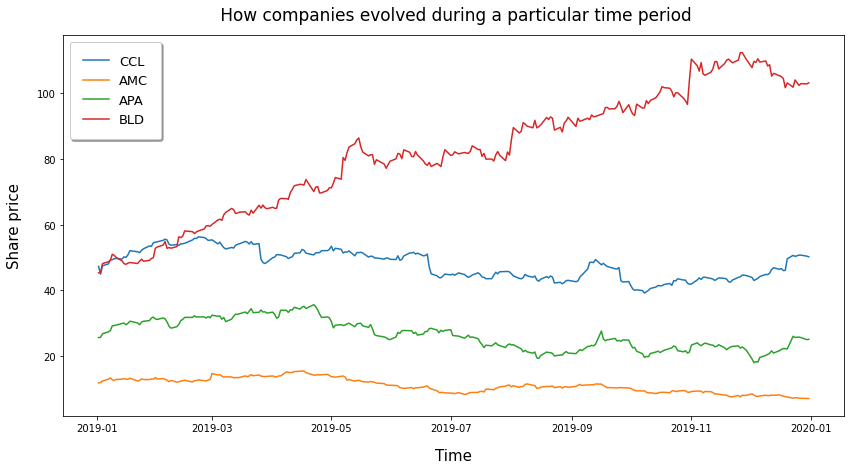

In [366]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

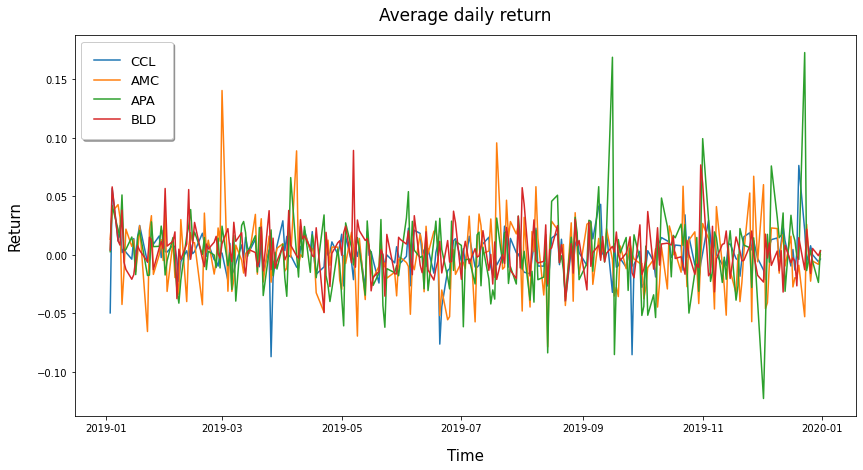

In [367]:
params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close.pct_change())
plt.title("Average daily return",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Return",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


In [368]:
#np.log(average daily return)
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,CCL,AMC,APA,BLD
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.051029,0.013102,0.002579,0.003962
2019-01-04,0.055033,0.036094,0.041087,0.056377
2019-01-07,0.011719,0.041944,0.021311,0.011766
2019-01-08,0.024577,0.031372,0.014754,0.008175
...,...,...,...,...
2019-12-24,-0.006262,0.025625,-0.013663,0.021489
2019-12-26,0.007627,-0.022897,0.003814,-0.016098
2019-12-27,0.000000,-0.005465,-0.005726,0.005362


In [369]:
# mean from average daily returns * trading days per year
log_returns.mean() * 252 

Symbols
CCL    0.060242
AMC   -0.506245
APA   -0.021180
BLD    0.824588
dtype: float64

In [370]:
# covariance from average daily returns * trading days per year
log_returns.cov() * 252

Symbols,CCL,AMC,APA,BLD
Symbols,,,,
CCL,0.078604,0.032426,0.033396,0.009741
AMC,0.032426,0.197294,0.044447,0.011577
APA,0.033396,0.044447,0.243038,0.020848
BLD,0.009741,0.011577,0.020848,0.089104


In [371]:
# correlation from average daily returns * trading days per year
log_returns.corr()

Symbols,CCL,AMC,APA,BLD
Symbols,,,,
CCL,1.000000,0.260382,0.241625,0.116390
AMC,0.260382,1.000000,0.202976,0.087317
APA,0.241625,0.202976,1.000000,0.141672
BLD,0.116390,0.087317,0.141672,1.000000


In [372]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

data_transposed = zip(portfolio_weights)
weights_in_dataframe = pd.DataFrame(data_transposed,columns=["Weights"])

co = companies

if len(companies) == 2: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2" ])
if len(companies) == 3: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3" ])
if len(companies) == 4: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4" ])
if len(companies) == 5: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5" ])
if len(companies) == 6: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6" ])
if len(companies) == 7: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6", "Weight7" ])
if len(companies) == 8: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6],  "Weight8: " + co[7]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6", "Weight7", "Weight8" ])


weights_in_dataframeee

,Weight1,Weight2,Weight3,Weight4
0,0.094372,0.405675,0.218241,0.281711
1,0.071845,0.354170,0.351452,0.222533
2,0.399237,0.053970,0.328246,0.218547
3,0.000275,0.438171,0.070368,0.491187
4,0.385144,0.000043,0.141527,0.473286
...,...,...,...,...
9995,0.501636,0.102653,0.014641,0.381071
9996,0.250294,0.224164,0.202655,0.322886
9997,0.376950,0.199759,0.064087,0.359204
9998,0.250453,0.399302,0.216454,0.133791


In [373]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750, hover_data=[weights_in_dataframe],
                 labels={'x': "Expected Volatility", 'y': "Expected Return",'hover_data_0': "Weights"})
fig.update_traces(marker=dict(size = 2))
fig.show()  

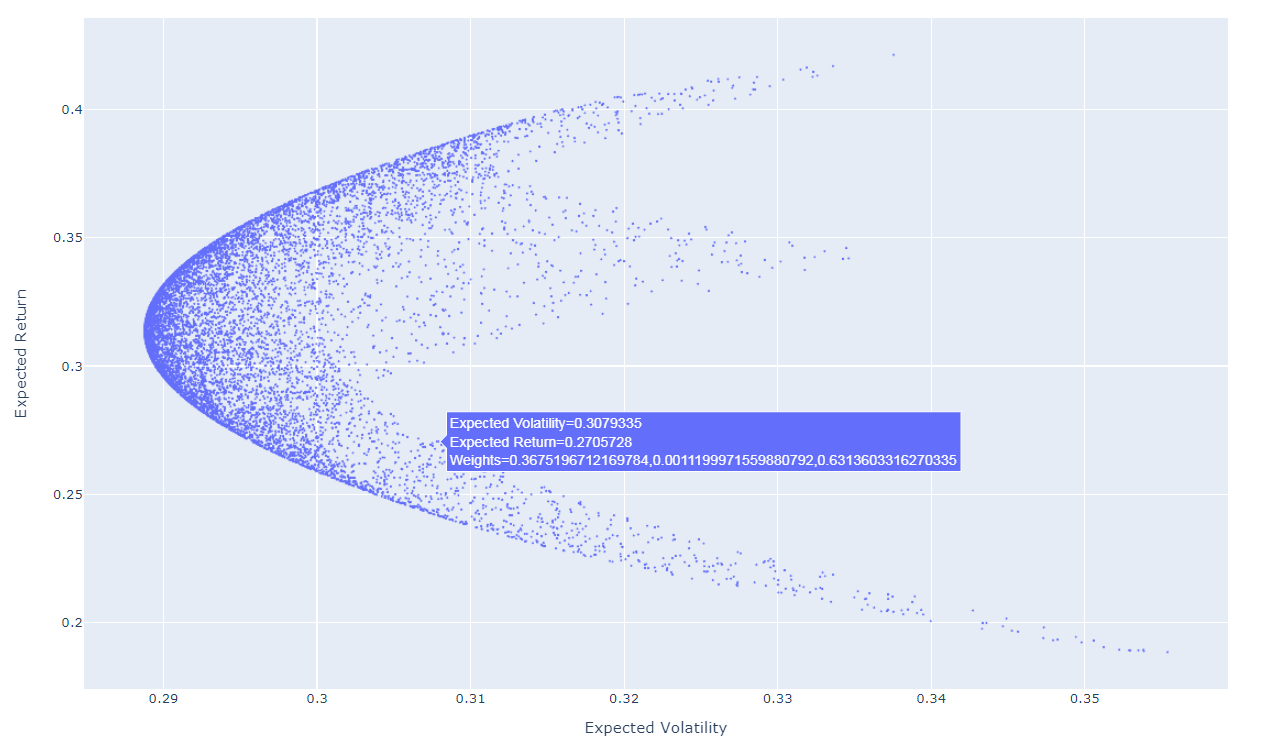

In [374]:
# minimum volatility portfolio

d = {'Volatility':portfolio_volatilities,'Returns':portfolio_returns}
m_v_p = pd.DataFrame(d)

m_v_p.reset_index(drop=True, inplace=True)
weights_in_dataframee.reset_index(drop=True, inplace=True)
 
portfolio = pd.concat([m_v_p,weights_in_dataframee],axis=1)

minimum = portfolio.loc[portfolio['Volatility'] == min(portfolio['Volatility'])]

mini = minimum[minimum.columns[0:2]]

print("The minimum volatility portfolio contains: \n")
minimum.iloc[0]

The minimum volatility portfolio contains: 



Volatility      0.206978
Returns         0.321346
Weight1: CCL    0.419118
Weight2: AMC    0.097620
Weight3: APA    0.062635
Weight4: BLD    0.420627
Name: 6745, dtype: float64

In [375]:
# optimal risk portfolio

opt_risk = portfolio.iloc[((portfolio['Returns']) / portfolio['Volatility']).idxmax()]
print("The optimal risk portfolio contains: \n")
print(opt_risk)


The optimal risk portfolio contains: 

Volatility      0.277540
Returns         0.760591
Weight1: CCL    0.078964
Weight2: AMC    0.001072
Weight3: APA    0.002619
Weight4: BLD    0.917345
Name: 457, dtype: float64


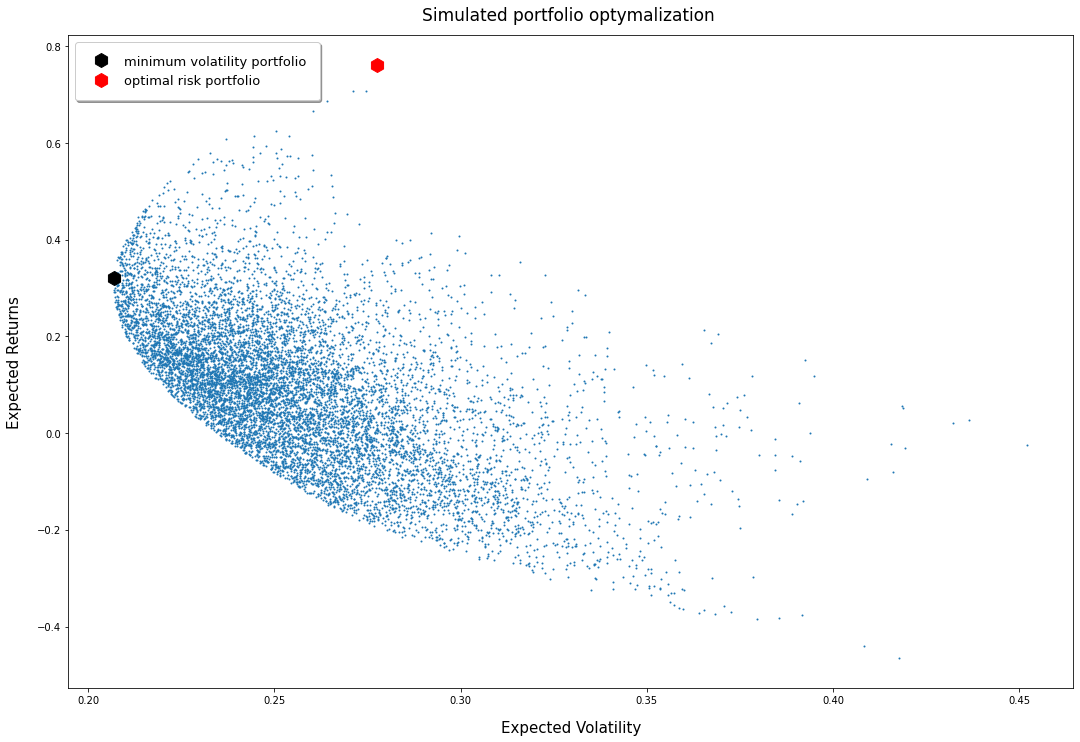

In [376]:
plt.scatter(portfolio_volatilities,portfolio_returns,s = 1)
plt.rcParams["figure.figsize"] = (18, 12)
plt.plot(mini['Volatility'],mini['Returns'],'h',color = 'black',markersize = 14)
plt.plot(opt_risk['Volatility'],opt_risk['Returns'],'h',color = 'red',markersize = 14)
legend_labels = ["minimum volatility portfolio", "optimal risk portfolio" ]
plt.title("Simulated portfolio optymalization ",fontsize=17, pad = 15)
plt.xlabel("Expected Volatility",fontsize=15,labelpad=15)
plt.ylabel("Expected Returns",fontsize=15,labelpad=15)
plt.legend(legend_labels, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 

plt.show()